# Tarea 2 - parte 2- Clustering

**Integrantes:**

- Yazmín Dominguez (yazmin.dominguez@usach.cl)
- Cristian Gonzalez Figueroa (cristian.gonzalez.figueroa@gmail.com)
- Cesar Deramond ( cderamond@gmail.com)

En esta segunda parte de la tarea, ud. utilizará algoritmos de clustering sobre datos de clientes de una entidad financiera. Estos datos incluyen el ID del cliente, el género, edad, ingreso anual y  un puntaje asociado a su ritmo de gastos.

## EDA

In [1]:
import pandas as pd

data = pd.read_csv("./data/consumidores.csv")
data = data.set_index("CustomerID")
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


tipos de datos en el set

In [6]:
data.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Verificamos que no hayan datos nulos o vacíos:

In [4]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Estadísticas típicas

In [3]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Graficamos los datos:

C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


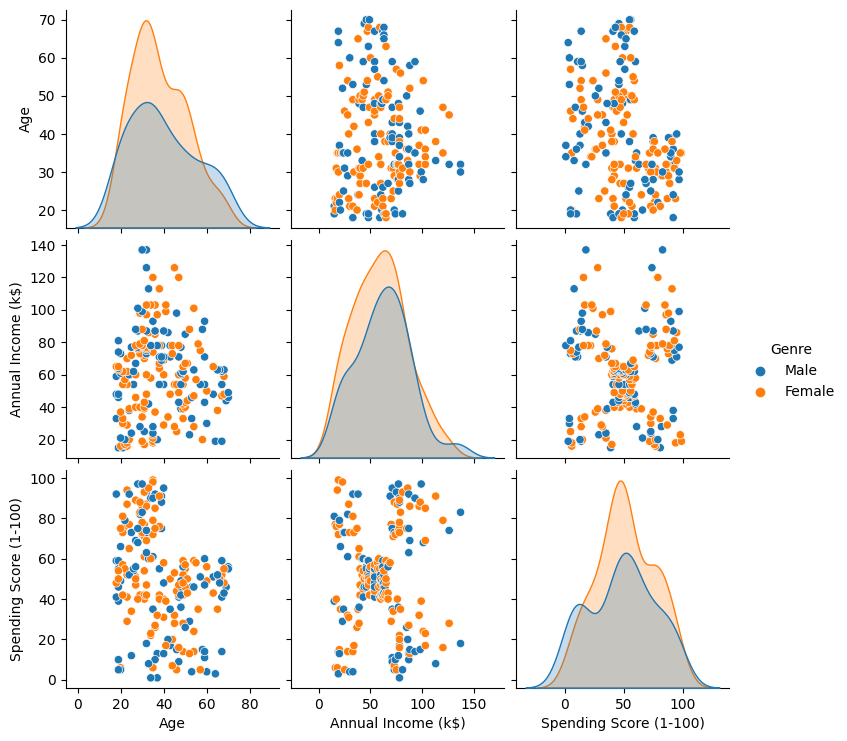

In [7]:
import seaborn as sns

sns.pairplot(data, hue='Genre')

En los pares de dispersión no se observan claras tendencias.

<Axes: >

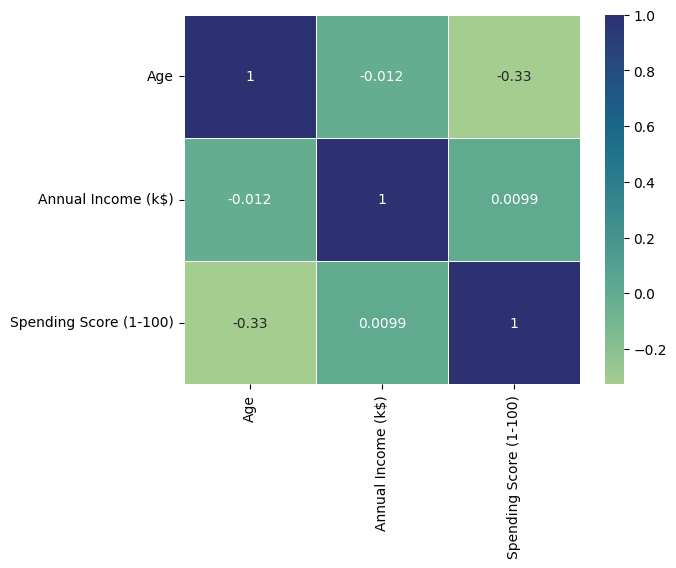

In [23]:
import seaborn as sns
# heatmap de correlaciones
c=data.corr(numeric_only='True')
sns.heatmap(c, cmap="crest",annot=True, linewidth=.5)

La correlación entre las variables Age y Spending Score (1-100) en tu conjunto de datos es de aproximadamente -0.327, lo que indica una correlación débil y negativa entre estas dos variables. Esto significa que a medida que la edad aumenta, el puntaje de gasto tiende a disminuir ligeramente, pero la relación no es muy fuerte.



## **1.- Ejecute el algoritmo K-means para encontrar grupos en el dataset de clientes. Utilice el algoritmo de silhouette para determinar la cantidad de clusters a encontrar, en un rango entre 2 y 11. Grafique los datos indicando su cluster en base a coloes que ud. escoja.**

### 1.- K-means

Estandarizamos los datos antes de aplicar el algoritmo de K-means para que todas las variables tengan el mismo peso.

In [24]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas de interés y estandarizarlas
X = data[['Age', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]  # Mostrar las primeras 5 filas de datos estandarizados


array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

Ahora, usaremos el método de silhouette para determinar el número óptimo de clústeres entre 2 y 11. La puntuación de silhouette varía entre -1 y 1, donde un valor cercano a 1 indica que los puntos de muestra están lejos de los clústeres vecinos, un valor de 0 indica que los puntos de muestra están muy cerca de la frontera de decisión entre dos clústeres vecinos y un valor cercano a -1 indica que los puntos de muestra se han asignado al clúster incorrecto.

Vamos a calcular la puntuación de silhouette para cada número de clústeres en el rango especificado y luego graficar estos valores para determinar el número óptimo de clústeres.

C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

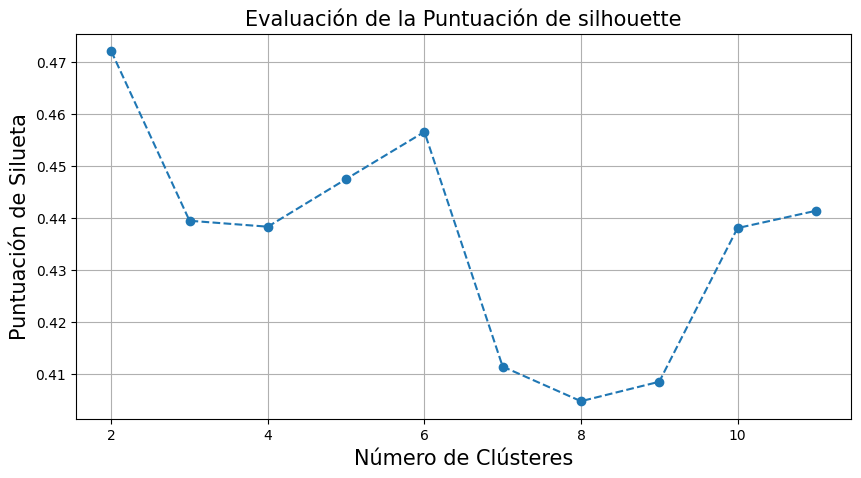

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calcular la puntuación de silueta para cada número de clústeres
silhouette_scores = []
range_n_clusters = range(2, 12)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar las puntuaciones de silueta
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres', fontsize=15)
plt.ylabel('Puntuación de Silueta', fontsize=15)
plt.title('Evaluación de la Puntuación de silhouette', fontsize=15)
plt.grid(True)
plt.show()

La gráfica muestra la puntuación de silhouette para diferentes números de clústeres. Si bien el valor más alto se observa con 2 clústeres, es importante considerar la complejidad y la interpretación de los datos. Elegir solo 2 clústeres podría ser una simplificación excesiva. Por otro lado, se puede observar un "codo" o punto de inflexión alrededor de 4 o 5 clústeres, lo que sugiere que esas podrían ser opciones razonables.
A medida que se supera el número de clústeres 6, las puntuaciones de silueta comienzan a disminuir, lo que sugiere que dividir los datos en más de 6 clústeres podría no ser tan beneficioso.

Para este análisis, elegiremos 5 clústeres y aplicaremos el algoritmo K-means con 5 clústeres, luego graficaremos los datos indicando su clúster usando colores diferentes.

C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


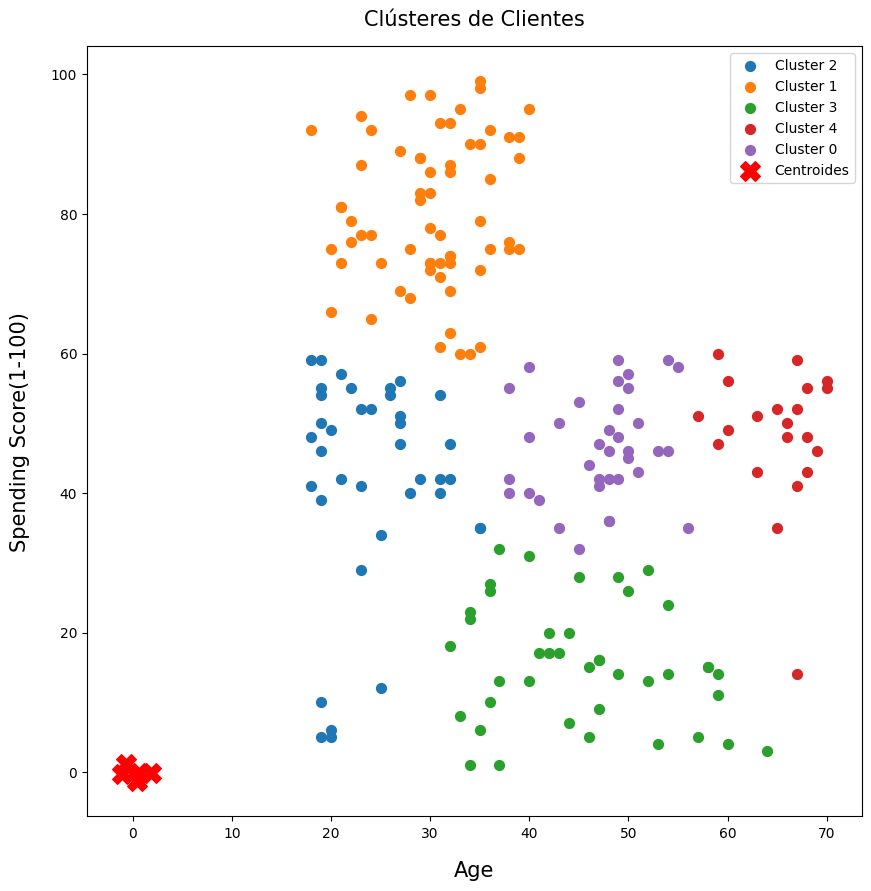

In [27]:
# Aplicar K-means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los datos con colores de clúster
plt.figure(figsize=(10,10))
for cluster in data['Cluster'].unique():
    subset = data[data['Cluster'] == cluster]
    plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label=f"Cluster {cluster}", s=50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Age', fontsize=15, labelpad=15)
plt.ylabel('Spending Score(1-100)', fontsize=15, labelpad=15)
plt.title('Clústeres de Clientes', fontsize=15, pad=15)
plt.legend()
plt.show()


Basándonos en el gráfico, podemos interpretar los clústeres de la siguiente manera:

- **Cluster 0 (Azul):** Clientes jóvenes con puntuaciones de gasto Intermedias
- **Cluster 1 (Naranja):** Clientes de mediana edad con puntuaciones de gasto altas
- **Cluster 2 (Verde):** Clientes adulto mayor con puntuaciones de gasto bajas.
- **Cluster 3 (Rojo):** Clientes de avanzada edad con puntuaciones de gasto intermedias.
- **Cluster 4 (Morado):** Clientes más mayores con puntuaciones de gasto intermedias.

El gráfico anterior nos proporciona una interesante perspectiva de la agrupación de los clientes en función de dos dimensiones cruciales: la edad y el gasto. Se observa que la segmentación en edad se divide de manera clara en tres grupos distintos: jóvenes (entre 20 y 30 años), personas de mediana edad (entre 30 y 60 años) y personas adulto mayor (mayores de 60 años).

En cuanto a las clasificaciones de gasto, se han definido tres categorías bien diferenciadas: gastos bajos (puntuaciones entre 0 y 30), gastos intermedios (puntuaciones entre 30 y 60) y gastos altos (puntuaciones mayores a 60).

Esta combinación de tres categorías de edad y tres categorías de gasto resulta en un total de nueve posibles combinaciones. Sin embargo, el algoritmo de clustering ha identificado eficazmente cinco clusters distintos, como se detalla en la tabla a continuación.

In [28]:
from prettytable import PrettyTable

# Crear una tabla con encabezados
tabla = PrettyTable()
tabla.field_names = ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"]

# Definir los datos de la tabla
datos_tabla = [
    ["Entre 20 y 30 años (Jóvenes)", "Cluster 0 (Azul)", "Cluster 0 (Azul)", "Cluster 1 (Naranja)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 2 (Verde)", "Cluster 4 (Morado)", "Cluster 1 (Naranja)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Rojo)"]
]

# Agregar los datos a la tabla
for fila in datos_tabla:
    tabla.add_row(fila)

# Imprimir la tabla formateada
print(tabla)


+-----------------------------------+-------------------+--------------------+---------------------+
|                Edad               |     Gasto Bajo    |  Gasto Intermedio  |      Gasto Alto     |
+-----------------------------------+-------------------+--------------------+---------------------+
|    Entre 20 y 30 años (Jóvenes)   |  Cluster 0 (Azul) |  Cluster 0 (Azul)  | Cluster 1 (Naranja) |
| Entre 30 y 60 Años (Mediana edad) | Cluster 2 (Verde) | Cluster 4 (Morado) | Cluster 1 (Naranja) |
|  Mayor a 60 Años (edad avanzada)  |                   |                    |   Cluster 3 (Rojo)  |
+-----------------------------------+-------------------+--------------------+---------------------+


Además de la interpretación de los clústeres, hay algunas conclusiones adicionales:
*  El uso de la técnica de K-Means ha permitido una segmentación efectiva de la base de clientes en cinco grupos distintos. Esta segmentación puede ser valiosa para adaptar estrategias comerciales y de marketing específicas para cada grupo.

*  Los resultados revelan que la base de clientes exhibe comportamientos de gasto diversificados. Desde clientes de edad avanzada con diferentes niveles de gasto, la diversidad de comportamiento es evidente.

*  Oportunidades de Desarrollo de estrategias: Los clústeres identificados ofrecen oportunidades significativas. Por ejemplo, el "Cluster 1" (clientes de mediana edad con puntuaciones de gasto altas) podría ser un objetivo clave para promociones de productos premium, mientras que el "Cluster 2" (clientes mayores con gastos bajos) podría requerir estrategias específicas para reactivar su participación.

*  El análisis de clústeres también puede ayudar a identificar tendencias emergentes. Por ejemplo, si un nuevo segmento de clientes comienza a surgir en futuros análisis, la empresa puede adaptar sus estrategias para satisfacer las necesidades cambiantes del mercado.

## **2.- Ejecute el algoritmo de clustering aglomerativo con la misma cantidad de clusters que en el método K-means, y grafique los datos indicando los clusters**



El clustering aglomerativo es un método de clustering jerárquico que comienza tratando a cada observación como un clúster individual y luego fusiona de manera sucesiva los pares de clústeres más cercanos hasta que solo queda un clúster.

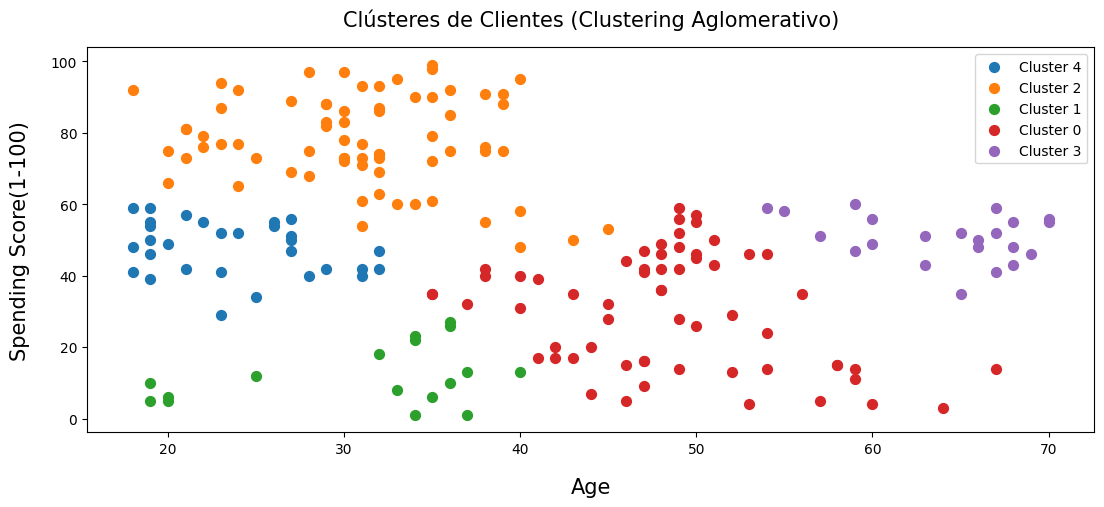

In [9]:
from sklearn.cluster import AgglomerativeClustering
# Aplicar clustering aglomerativo con 5 clústeres
agglomerative = AgglomerativeClustering(n_clusters=5)
data['AggCluster'] = agglomerative.fit_predict(X_scaled)

# Graficar los datos con colores de clúster
plt.figure(figsize=(13,5))
for cluster in data['AggCluster'].unique():
    subset = data[data['AggCluster'] == cluster]
    plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label=f"Cluster {cluster}", s=50)

plt.xlabel('Age', fontsize=15, labelpad=15)
plt.ylabel('Spending Score(1-100)', fontsize=15, labelpad=15)
plt.title('Clústeres de Clientes (Clustering Aglomerativo)', fontsize=15, pad=15)
plt.legend()
plt.show()

Basándonos en el gráfico, podemos interpretar los clústeres de la siguiente manera:

- **Cluster 0 (Rojo):** Clientes de media y avanzada edad con puntuaciones de gasto baja y intermedias.
- **Cluster 1 (Verde):** Clientes jóvenes y de mediana edad con puntuaciones de gasto bajas.
- **Cluster 2 (Naranja):** Clientes jóvenes y de mediana edad con puntuaciones de gasto altas.
- **Cluster 3 (Morado):** Clientes más mayores con puntuaciones de gasto Intermedias.
- **Cluster 4 (Azul):** Clientes jóvenes con puntuaciones de gasto intermedias.

*  Las agrupaciones generadas por ambos métodos son bastante similares, con una diferencia destacable. En el método K-Means, los jóvenes se agrupaban por gasto bajo y gasto intermedio, mientras que en el método de Clustering Aglomerativo, se creó un clúster exclusivo para los jóvenes de gasto bajo, separándolos de los de gasto intermedio.

*  Por otro lado, en el caso de las personas de mediana edad, el método K-Means generaba tres clústeres distintos, uno para gasto alto, uno para gasto medio y otro para gasto bajo. En cambio, el método de Clustering Aglomerativo agrupó lo de gastos bajo e intermedio en un solo cluster.

*La diferencia en la forma en que el Clustering Aglomerativo separó o agrupó los clústeres en comparación con K-Means se debe a las diferencias en la metodología y los conceptos subyacentes de cada algoritmo. Veamos las razones detrás de estos resultados:


Clustering Aglomerativo:

* En el Clustering Aglomerativo, se comienza considerando que cada punto de datos es un clúster individual y, a medida que se ejecuta el algoritmo, los clústeres se fusionan gradualmente en función de alguna métrica de distancia.
En el caso de los jóvenes con gasto bajo y gasto intermedio, el algoritmo puede haber identificado que estos grupos eran lo suficientemente distintos para separarlos en dos clústeres diferentes durante el proceso de fusión. Esto podría haber sido el resultado de una mayor distancia o disimilitud entre estos grupos en comparación con otras agrupaciones.

K-Means:

*  K-Means busca agrupar los datos en un número predefinido de clústeres y minimiza la varianza dentro de esos clústeres. Esto significa que, si inicialmente se asignaron jóvenes a un clúster, K-Means intentaría mantenerlos juntos en el mismo clúster a menos que haya una fuerte razón para separarlos.
En el caso de los clientes de mediana edad, K-Means puede haber detectado diferencias significativas en términos de gasto, lo que llevó a la separación en clústeres de gasto bajo e intermedio.


En resumen, las diferencias en la asignación de clústeres entre estos métodos se deben a sus enfoques y suposiciones subyacentes. El Clustering Aglomerativo es más flexible en la forma en que agrupa los datos, permitiendo una estructura jerárquica y fusionando clústeres de manera progresiva en función de la distancia. K-Means busca asignaciones no jerárquicas y busca minimizar la varianza intraclúster.


In [26]:
from tabulate import tabulate

# Datos para la tabla K-Means
datos_kmeans = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "Cluster 0 (Azul)", "Cluster 0 (Azul)", "Cluster 1 (Naranja)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 2 (Verde)", "Cluster 4 (Morado)", "Cluster 1 (Naranja)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Rojo)"]
]

# Datos para la tabla Clustering aglomerativo
datos_aglomerativo = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "Cluster 1 (verde)", "Cluster 4 (Azul)", "Cluster 2 (Naranja)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 0 (Rojo)", "Cluster 0 (Rojo)", "Cluster 2 (Naranja)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Morado)"]
]

# Imprimir la tabla K-Means
print("K-Means")
print(tabulate(datos_kmeans, headers='firstrow', tablefmt='grid'))

# Imprimir la tabla Clustering aglomerativo
print("\nClustering aglomerativo")
print(tabulate(datos_aglomerativo, headers='firstrow', tablefmt='grid'))


K-Means
+-----------------------------------+-------------------+--------------------+---------------------+
| Edad                              | Gasto Bajo        | Gasto Intermedio   | Gasto Alto          |
+===================================+===================+====================+=====================+
| Entre 20 y 30 años (Jóvenes)      | Cluster 0 (Azul)  | Cluster 0 (Azul)   | Cluster 1 (Naranja) |
+-----------------------------------+-------------------+--------------------+---------------------+
| Entre 30 y 60 Años (Mediana edad) | Cluster 2 (Verde) | Cluster 4 (Morado) | Cluster 1 (Naranja) |
+-----------------------------------+-------------------+--------------------+---------------------+
| Mayor a 60 Años (edad avanzada)   |                   |                    | Cluster 3 (Rojo)    |
+-----------------------------------+-------------------+--------------------+---------------------+

Clustering aglomerativo
+-----------------------------------+-------------------+-

## **3.- Ejecute el algoritmo DBSCAN sobre el conjunto de datos. Utilice eps = 12 y minpts (o min samples) = 8.**


DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad. Funciona identificando áreas densas de puntos y separando puntos en regiones de baja densidad (ruido).

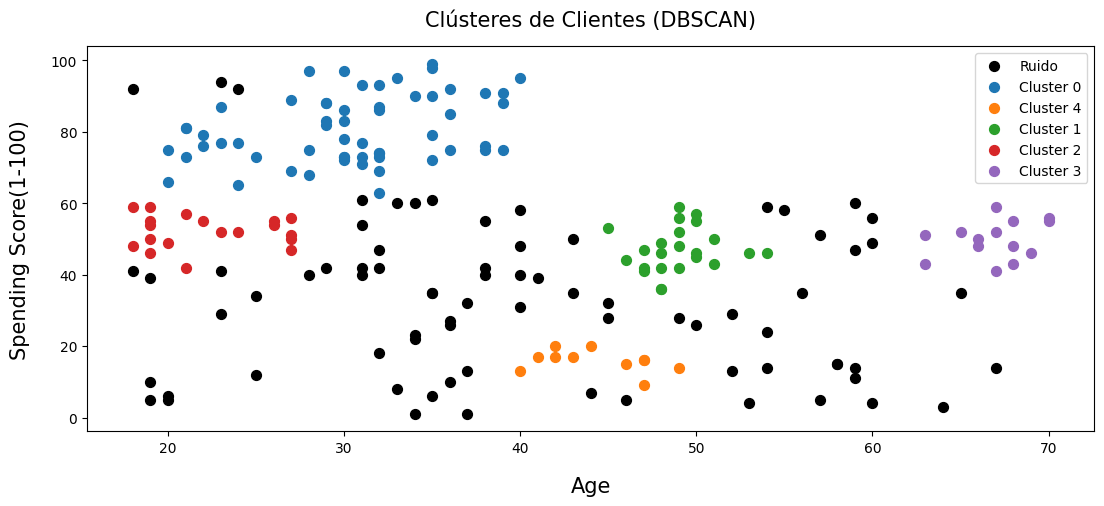

In [10]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=8)
data['DBSCANCluster'] = dbscan.fit_predict(X_scaled)

# Graficar los datos con colores de clúster
plt.figure(figsize=(13,5))

# DBSCAN puede etiquetar algunos puntos como ruido (etiqueta = -1)
clusters = data['DBSCANCluster'].unique()
for cluster in clusters:
    subset = data[data['DBSCANCluster'] == cluster]
    if cluster == -1:  # ruido
        plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label="Ruido", s=50, color='black')
    else:
        plt.scatter(subset['Age'], subset['Spending Score (1-100)'], label=f"Cluster {cluster}", s=50)

plt.xlabel('Age', fontsize=15, labelpad=15)
plt.ylabel('Spending Score(1-100)', fontsize=15, labelpad=15)
plt.title('Clústeres de Clientes (DBSCAN)', fontsize=15, pad=15)
plt.legend()
plt.show()

Los puntos etiquetados como "Ruido" son representados en color negro. Estos son puntos que el algoritmo considera como no pertenecientes a ningún clúster debido a su baja densidad.

Basándonos en el gráfico, podemos interpretar los clústeres de la siguiente manera:

- **Cluster 0 (Azul):** Clientes de baja y mediana edad con puntuaciones de gasto altas.
- **Cluster 1 (Verde):** Clientes de mediana edad con puntuaciones de gasto medias.
- **Cluster 2 (rojo):** Clientes jóvenes con puntuaciones de gasto medias.
- **Cluster 3 (Morado):** Clientes más mayores con puntuaciones de gasto Medias.
- **Cluster 4 (Naranja):** Clientes de mediana edad con puntuaciones de gasto bajas.

A continuacion una tabla comparativa de los cambios de los cluster por los diferentes metodos anteriores

In [31]:
from tabulate import tabulate

# Datos para la tabla K-Means
datos_kmeans = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "Cluster 0 (Azul)", "Cluster 0 (Azul)", "Cluster 1 (Naranja)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 2 (Verde)", "Cluster 4 (Morado)", "Cluster 1 (Naranja)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Rojo)"]
]

# Datos para la tabla Clustering aglomerativo
datos_aglomerativo = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "Cluster 1 (verde)", "Cluster 4 (Azul)", "Cluster 2 (Naranja)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 0 (Rojo)", "Cluster 0 (Rojo)", "Cluster 2 (Naranja)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Morado)"]
]

# Datos para la tabla DBSCAN
datos_dbscan = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "", "Cluster 2 (Rojo)", "Cluster 0 (Azul)"],
    ["Entre 30 y 60 Años (Mediana edad)", "Cluster 4 (Naranja)", "Cluster 1 (Verde)", "Cluster 0 (Azul)"],
    ["Mayor a 60 Años (edad avanzada)", "", "", "Cluster 3 (Morado)"]
]

# Datos para la tabla Ruido, eliminación de puntos
datos_ruido = [
    ["Edad", "Gasto Bajo", "Gasto Intermedio", "Gasto Alto"],
    ["Entre 20 y 30 años (Jóvenes)", "Total", "", ""],
    ["Entre 30 y 60 Años (Mediana edad)", "Parcial", "Parcial", ""],
    ["Mayor a 60 Años (edad avanzada)", "Parcial", "", ""]
]

# Imprimir la tabla K-Means
print("K-Means")
print(tabulate(datos_kmeans, headers='firstrow', tablefmt='grid'))

# Imprimir la tabla Clustering aglomerativo
print("\nClustering aglomerativo")
print(tabulate(datos_aglomerativo, headers='firstrow', tablefmt='grid'))

# Imprimir la tabla DBSCAN
print("\nDBSCAN")
print(tabulate(datos_dbscan, headers='firstrow', tablefmt='grid'))

# Imprimir la tabla Ruido, eliminación de puntos
print("\nRuido, eliminación de puntos")
print(tabulate(datos_ruido, headers='firstrow', tablefmt='grid'))


K-Means
+-----------------------------------+-------------------+--------------------+---------------------+
| Edad                              | Gasto Bajo        | Gasto Intermedio   | Gasto Alto          |
+===================================+===================+====================+=====================+
| Entre 20 y 30 años (Jóvenes)      | Cluster 0 (Azul)  | Cluster 0 (Azul)   | Cluster 1 (Naranja) |
+-----------------------------------+-------------------+--------------------+---------------------+
| Entre 30 y 60 Años (Mediana edad) | Cluster 2 (Verde) | Cluster 4 (Morado) | Cluster 1 (Naranja) |
+-----------------------------------+-------------------+--------------------+---------------------+
| Mayor a 60 Años (edad avanzada)   |                   |                    | Cluster 3 (Rojo)    |
+-----------------------------------+-------------------+--------------------+---------------------+

Clustering aglomerativo
+-----------------------------------+-------------------+-


*  Con el método DBSCAN, se eliminó por completo el cluster que contenía a los jóvenes con gasto bajo, ya que todos los puntos dentro de este grupo fueron identificados como ruido (representados por puntos negros).

*  Además, se realizó una eliminación parcial de puntos en la categoría de edad mediana, en los segmentos de gasto bajo e intermedio.

*  En el caso de las personas mayores de 60 años, también se eliminaron algunos puntos de manera parcial en la categoría de gasto bajo.

*  DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de agrupación que se basa en la densidad de puntos en un espacio de datos para identificar clústeres.

**Las principales razones por las que DBSCAN generó estos resultados son:**

* Eliminación del cluster de jóvenes con gasto bajo: DBSCAN es sensible a la densidad de puntos. En este caso, la grafica muestra que todos los jóvenes con gasto bajo estaban muy cerca entre sí y no formaban un grupo denso, lo que llevó a que DBSCAN los clasificara como ruido y los eliminara. Esto podría deberse a que los jóvenes con gasto bajo no tenían suficientes similitudes entre sí en términos de sus características (edad, gasto) para formar un clúster significativo.

*  Eliminación parcial de puntos en la categoría de edad mediana: Para las personas de edad mediana, DBSCAN pudo haber identificado dos grupos densos en sus cercanias que se superponían y DBSCAN etiquetó algunos puntos como ruido.

*  Eliminación parcial de puntos en la categoría de mayores de 60 años: Similar al caso de las personas de edad mediana.

## 4.- Conclusiones

**¿Qué algoritmo permite encontrar clusters más claros y disjuntos?, justifique su respuesta:**

Según los clusters obtenidos, el algoritmo que mejor representa el conjunto de datos de forma clara es el algoritmo de K-means. Representa de buena forma la distribución de edad y gastos, no posee ruido como ocurre en el caso de DBSCAN que deja muchos datos fuera del análisis y posee una mejor agrupación que el algoritmo de Cluster Aglomerativo, que si bien la solución es buena, no alcanza a la exactitud de K-means para el dataset analizado.

_ En el contexto de nuestro conjunto de datos, se evaluaron tres algoritmos de clustering: K-Means, Clustering Aglomerativo y DBSCAN. Cada uno de estos algoritmos presenta ventajas y desventajas particulares que influyen en su rendimiento en la segmentación de clientes basada en la edad y el nivel de gasto.

K-Means: Este algoritmo generó clústeres que representan de manera efectiva la distribución de la edad y el gasto en el conjunto de datos. Proporciona una segmentación clara y precisa, lo que lo convierte en una excelente opción para nuestro análisis. Sin embargo, es importante destacar que K-Means requiere que se especifique previamente el número de clústeres, lo que puede ser un desafío si no tenemos un conocimiento previo sólido sobre la estructura de nuestros datos. Además, K-Means puede ser sensible a valores atípicos y a la inicialización de los centroides.

Clustering Aglomerativo: Si bien este algoritmo proporciona una solución jerárquica que puede ser útil para comprender la estructura de los clústeres, no logra la misma precisión que K-Means en nuestro conjunto de datos. La segmentación resultante es buena, pero no alcanza la exactitud de K-Means. Clustering Aglomerativo también es computacionalmente más intensivo,sin embargo, ofrece la ventaja de no requerir una especificación previa del número de clústeres.

DBSCAN: Aunque DBSCAN es robusto en la detección de valores atípicos y puede identificar automáticamente el número de clústeres, en nuestro caso eliminó por completo un clúster de jóvenes con gasto bajo, catalogándolo como ruido. Esto puede no ser deseable, ya que estos clientes podrían representar una parte importante de nuestra base. Además, DBSCAN realizó una eliminación parcial de puntos en la categoría de edad mediana y algunos de los mayores de 60 años, lo que puede ser problemático si estamos interesados en una segmentación más detallada en estas categorías.

Si buscamos una segmentación clara y precisa en nuestro conjunto de datos, K-Means es la opción preferida.